In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_csv = pd.read_csv('/opt/ml/code/input/train.csv')

In [4]:
train_csv.head()

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,11.4675,13085,United Kingdom,137.61
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,3.4650,13085,United Kingdom,166.32
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2.0625,13085,United Kingdom,49.50


In [5]:
customer_list = list(set(train_csv.customer_id))

In [6]:
len(customer_list)

5914

In [7]:
train_csv['y_m_d'] = [elem[:10] for elem in train_csv['order_date'].copy()]
train_csv['y_m'] = [elem[:7] for elem in train_csv['order_date'].copy()]

In [8]:
train_csv.head()

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total,y_m_d,y_m
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,11.4675,13085,United Kingdom,137.61,2009-12-01,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65,2009-12-01,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65,2009-12-01,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,3.4650,13085,United Kingdom,166.32,2009-12-01,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2.0625,13085,United Kingdom,49.50,2009-12-01,2009-12


In [10]:
customer_date_grouped = train_csv.groupby(['customer_id', 'y_m'])[['quantity', 'total']].sum()

In [11]:
customer_date_grouped.head()

quantity     total
customer_id y_m                        
12346       2009-12        26  187.2750
            2010-01        19  -22.2750
            2010-03         5   44.6325
            2010-06         5 -285.9285
            2010-10        -2   -9.0750

In [19]:
customer_date_grouped.xs('2009-12', level=1)

,quantity,total
customer_id,,
12346,26,187.2750
12349,-5,-39.8475
12358,309,2359.2195
12359,397,1255.1385
12362,1,214.5000
...,...,...
18271,89,317.7075
18275,224,614.8560
18276,193,359.7825


(array([1.000e+00, 0.000e+00, 1.185e+03, 1.100e+01, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([-19603.386  , -10614.54405,  -1625.7021 ,   7363.13985,
         16351.9818 ,  25340.82375,  34329.6657 ,  43318.50765,
         52307.3496 ,  61296.19155,  70285.0335 ]),
 <a list of 10 Patch objects>)

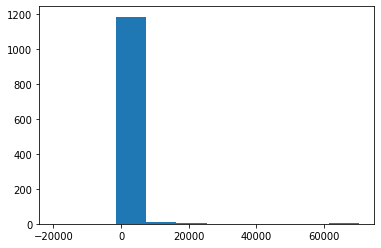

In [79]:
plt.hist(customer_date_grouped.xs('2010-09', level=1)['total'])

In [85]:
customer_date_grouped.xs('2010-09', level=1)['total'].describe()

count     1202.000000
mean      1068.683930
std       3319.825839
min     -19603.386000
25%        321.304500
50%        567.410250
75%       1010.769375
max      70285.033500
Name: total, dtype: float64

In [86]:
customer_date_grouped.xs('2010-09', level=1)['total'].describe()['75%']

1010.7693750000003

In [84]:
y_m_index = list(set(train_csv.y_m))

In [89]:
len(y_m_index)

24

In [87]:
total_quantile = [[] for _ in y_m_index]

In [88]:
for i, y_m in enumerate(y_m_index):
    total_quantile[i].append(customer_date_grouped.xs(y_m, level=1)['total'].describe()['25%'])
    total_quantile[i].append(customer_date_grouped.xs(y_m, level=1)['total'].describe()['50%'])
    total_quantile[i].append(customer_date_grouped.xs(y_m, level=1)['total'].describe()['75%'])

In [90]:
total_lower_quantile = []
total_middle_quantile = []
total_upper_quantile = []

for i in range(24):
    total_lower_quantile.append(total_quantile[i][0])
    total_middle_quantile.append(total_quantile[i][1])
    total_upper_quantile.append(total_quantile[i][2])

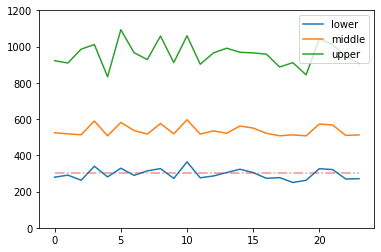

In [104]:
plt.plot(range(24), total_lower_quantile, label="lower")
plt.plot(range(24), total_middle_quantile, label="middle")
plt.plot(range(24), total_upper_quantile, label="upper")
plt.plot(range(24), [300]*24, "-.", alpha=0.5)
plt.ylim((0, 1200))
plt.legend()

In [111]:
total_2010_01 = (customer_date_grouped.xs('2010-01', level=1)['total']>1000)

In [112]:
total_2010_01.index

Int64Index([12346, 12361, 12382, 12404, 12406, 12417, 12431, 12437, 12439,
            12454,
            ...
            18212, 18220, 18223, 18225, 18229, 18231, 18242, 18252, 18259,
            18268],
           dtype='int64', name='customer_id', length=786)

In [118]:
def get_customer_over(y_m, total_lim):
    total_y_m = customer_date_grouped.xs(y_m, level=1)['total']
    total_y_m = total_y_m[total_y_m>total_lim]
    return set(total_y_m.index)

In [125]:
cust_2010_01_over_1000 = get_customer_over('2010-01', 1000)
cust_2010_02_over_1000 = get_customer_over('2010-02', 1000)
cust_2010_03_over_1000 = get_customer_over('2010-03', 1000)
cust_2010_04_over_1000 = get_customer_over('2010-04', 1000)

In [126]:
print(len(cust_2010_01_over_1000))
print(len(cust_2010_02_over_1000))
print(len(cust_2010_03_over_1000))
print(len(cust_2010_04_over_1000))

180
183
249
238


In [127]:
len(cust_2010_01_over_1000 & cust_2010_02_over_1000)

64

In [128]:
len(cust_2010_02_over_1000 & cust_2010_03_over_1000)

72

In [129]:
len(cust_2010_03_over_1000 & cust_2010_04_over_1000)

83

In [130]:
len(cust_2010_03_over_1000 & cust_2010_04_over_1000 & cust_2010_01_over_1000 & cust_2010_02_over_1000)

37

In [138]:
def get_customer_topn(y_m, n, print_og=False):
    total_y_m = customer_date_grouped.xs(y_m, level=1)['total']
    total_y_m = total_y_m.sort_values()
    if print_og:
        print(total_y_m)
    return set(total_y_m[-n:].index)

In [139]:
cust_2010_01_top200 = get_customer_topn('2010-01', 200, True)


customer_id
17940    -2080.5840
17943     -272.2995
12533     -216.8100
14285     -207.5370
14290     -189.7170
            ...    
14911    15382.0095
13694    32342.2770
14646    47680.5780
18102    63616.2450
14156    80476.7535
Name: total, Length: 786, dtype: float64


In [140]:
cust_2010_02_top200 = get_customer_topn('2010-02', 200)
cust_2010_03_top200 = get_customer_topn('2010-03', 200)
cust_2010_04_top200 = get_customer_topn('2010-04', 200)

In [141]:
print(len(cust_2010_01_top200))
print(len(cust_2010_02_top200))
print(len(cust_2010_03_top200))
print(len(cust_2010_04_top200))

200
200
200
200


In [142]:
len(cust_2010_01_top200 & cust_2010_02_top200)

70

In [143]:
len(cust_2010_03_top200 & cust_2010_02_top200)

66

In [144]:
len(cust_2010_03_top200 & cust_2010_04_top200)

66